# **HOMEWORK 2: PANDAS and SQL (TOTAL 80)**
## **DUE: *SEPTEMBER 26, 2024 @ 11:59 PM***

---------------------
#### **DATASET DESCRIPTION**

The [NCEI/WDS Global Significant Volcanic Eruptions Database](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ngdc.mgg.hazards:G10147) is a very comprehensive collection of +600 volcanic eruptions dating from 4360 BC to the present. Due to the nature of this assignment, we will be dealing with relatively newer volcanoes (in which some are still obviously still older than anyone on Earth currently). Each eruption in the database is classified as significant if it meets one or more criteria, such as causing fatalities, incurring **damage on property** (**+$1 million**), reaching a **Volcanic Explosivity Index (VEI)** of **6 or higher**, generating a tsunami, or being linked to a significant earthquake. The VEI is a scale that measures the explosiveness of volcanic eruptions, providing insight into the magnitude and potential consequences of the eruptions. The database includes detailed information on the location, type of volcano, last known eruption, VEI, casualties, property damage, and much more.
![volcano](https://wikitravel.org/upload/shared//9/99/Volcano_de_Fuego_Banner.jpg)

#### **Objective of the Assignment:**


We will proceed directly to exploring these volcanic datasets, with the aim of enhancing our proficiency in Pandas and SQL.

For your reference, the [Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html) will be an invaluable resource. Additionally, we have provided several helpful links to assist you throughout this process. Please proceed with caution to avoid any potential pitf

---------------------

### **DO NOT REMOVE ANY PART OF ANY OF THE QUESTIONS OR YOU LOSE CREDIT**
### *No Hardcoding either*  
### **REMEMBER TO SHOW ALL CODE OUTPUT (NO CREDIT OTHERWISE)**

### **Part 1: Maintenance  (25 POINTS TOTAL)**

First, in this section, we will focus on the initial steps of the process.

As is standard practice in Python programming, it is best to import necessary modules at the beginning of your script before writing any additional code. This approach ensures that all required libraries are available from the start.

In [41]:
# Make sure these code blocks run properly and that you have properly installed the appropriate modules required.
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
from tqdm import tqdm

# import other libraries here

# Don't remove this
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

As you may have noticed, there is an additional library, apart from Pandas, called "[requests](https://requests.readthedocs.io/en/latest/)."

**The requests library enables you to send HTTP requests to a server, retrieve content, and process it with ease.**  It is particularly user-friendly for beginners venturing into web scraping, which is crucial for collecting and constructing datasets. Additionally, we recommend exploring [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/), , a complementary library that can be used alongside requests for more efficient web scraping.

* As shown below, sometimes specific websites require specific headers in order to process a request to access the data.

* To check if a request was processed successfully, use the [status_code](https://requests.readthedocs.io/en/latest/api/) function to see if the process returned 200.

In [42]:
# API URL and headers in case request gets denied.
api_url = "https://www.ngdc.noaa.gov/hazel/hazard-service/api/v1/volcanoes"

headers = {
    'accept': '*/*'
}

#### **TASK 1.0: Webscraping (5 points)**

To develop our web scraper, we need to **initiate a GET request** a GET request using the relevant information provided above.

This specific NOAA dataset API returns data in JSON format when a request is made. The JSON data is structured in a particular format, so we will extract the necessary information solely from the field named "items" to construct a DataFrame.

**After successfully scraping the data, name the resulting DataFrame** ***df***

**Subsequently, save this DataFrame to a CSV file named volcanoes.csv.**

**This process should only need to be executed once.**


In [43]:
%%time
response = requests.get(api_url)
response

CPU times: total: 46.9 ms
Wall time: 305 ms


<Response [200]>

In [44]:
df = pd.DataFrame(response.json()['items'])
df.to_csv(r"C:\Users\asuto\Desktop\Master's\Padhai\DATA602 - Data Science\DATA602_HW\DATA602_FardinaAlam\HW\volcanoes.csv",index=False)

#### **TASK 1.1: 1-Liner Overview (3 points)**
To gain an understanding of the dataset's structure, we need to examine some fundamental characteristics of the DataFrame. We need to get an idea of what this dataset is going to look. In order to do that, let's take a look at some of the most [basic things](https://dataanalytics.buffalostate.edu/pandas-cheat-sheet) our dataframe has.


***CAN'T USE LOOPS. DO NOT DISPLAY THE DATAFRAME, JUST YOUR CODE OUTPUT HERE.***

**1.1.1:** *In one line of code and **using only one function**, show how many **total datapoints and features** there are in the dataframe **together**.*

In [45]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               200 non-null    int64  
 1   year                             200 non-null    int64  
 2   month                            177 non-null    float64
 3   day                              153 non-null    float64
 4   tsunamiEventId                   37 non-null     float64
 5   earthquakeEventId                17 non-null     float64
 6   volcanoLocationId                200 non-null    int64  
 7   volcanoLocationNewNum            200 non-null    int64  
 8   volcanoLocationNum               200 non-null    object 
 9   name                             200 non-null    object 
 10  location                         200 non-null    object 
 11  country                          200 non-null    object 
 12  latitude              

**1.1.2:** *In one line of code, list the **names** of all the **features** in the dataframe.*

In [46]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
df.columns

Index(['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'volcanoLocationNum',
       'name', 'location', 'country', 'latitude', 'longitude', 'elevation',
       'morphology', 'agent', 'deathsTotal', 'deathsAmountOrderTotal',
       'damageAmountOrderTotal', 'significant', 'publish', 'eruption',
       'status', 'timeErupt', 'vei', 'deathsAmountOrder', 'damageAmountOrder',
       'housesDestroyedAmountOrderTotal', 'deaths', 'injuries',
       'injuriesAmountOrder', 'injuriesTotal', 'injuriesAmountOrderTotal',
       'housesDestroyedAmountOrder', 'housesDestroyed', 'housesDestroyedTotal',
       'missingAmountOrder', 'missingAmountOrderTotal', 'missing',
       'missingTotal', 'damageMillionsDollars', 'damageMillionsDollarsTotal'],
      dtype='object')

We won't be using some of the data because there is a lot of missing data.

**1.1.3:** *In one line of code, create a **new dataframe** called **new_df** that **contains all** the features of the **old** dataframe **except the following**:*

volcanoLocationNum, location, latitude, longitude, agent, significant,	publish,	eruption,	status, timeErupt, damageAmountOrder, damageAmountOrderTotal, housesDestroyedAmountOrder,	housesDestroyedAmountOrderTotal, housesDestroyed,	housesDestroyedTotal,	missingAmountOrder,	missingAmountOrderTotal,	missing,	missingTotal, damageMillionsDollars, damageMillionsDollarsTotal, injuries, injuriesAmountOrder, injuriesTotal, injuriesAmountOrderTotal, deathsAmountOrderTotal, and deathsAmountOrder.



In [47]:
#creating list of columns to not use.
dropColsStr = 'volcanoLocationNum, location, latitude, longitude, agent, significant, publish, eruption, status, timeErupt, damageAmountOrder, damageAmountOrderTotal, housesDestroyedAmountOrder, housesDestroyedAmountOrderTotal, housesDestroyed, housesDestroyedTotal, missingAmountOrder, missingAmountOrderTotal, missing, missingTotal, damageMillionsDollars, damageMillionsDollarsTotal, injuries, injuriesAmountOrder, injuriesTotal, injuriesAmountOrderTotal, deathsAmountOrderTotal, deathsAmountOrder'
dropCols = dropColsStr.split(', ')

In [48]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
new_df = df[df.columns[~df.columns.isin(dropCols)]]
# KEEP THIS. It will display the whole dataframe.
new_df.columns

Index(['id', 'year', 'month', 'day', 'tsunamiEventId', 'earthquakeEventId',
       'volcanoLocationId', 'volcanoLocationNewNum', 'name', 'country',
       'elevation', 'morphology', 'deathsTotal', 'vei', 'deaths'],
      dtype='object')

#### **TASK 1.2: 1 Liner Shenaniganz (7 points)**

We're going to tidy up the **new dataframe** a little more with some more advanced 1 liner code.

**Read the directions carefully and code your answer with only one line of code.**

**For this section, keep the method of display that is already in the box. Write your code as indicated.**

***YOU CAN'T USE ONE LINE LOOPS OR ANY KIND OF LOOP.***

**1.2.1:** *In one line of code, **discard any row** that contains **NaN** in **any one** of the columns indicating **time**.*

In [49]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
new_df = new_df.dropna(axis=0,subset=['year','month','day'])
# KEEP THIS. It will display the whole dataframe.
new_df.head()

id  year  month   day  tsunamiEventId  earthquakeEventId  \
0   1  1169    2.0   4.0          2852.0              421.0   
3   4  1888    3.0  13.0          1175.0                NaN   
5   6  1832   11.0   1.0             NaN                NaN   
6   7  1977    1.0  10.0             NaN                NaN   
8   9  1779    8.0   8.0             NaN                NaN   

   volcanoLocationId  volcanoLocationNewNum           name           country  \
0              10106                 211060           Etna             Italy   
3              50107                 251070  Ritter Island  Papua New Guinea   
5              10106                 211060           Etna             Italy   
6              20303                 223030     Nyiragongo        Congo, DRC   
8              10102                 211020       Vesuvius             Italy   

   elevation       morphology  deathsTotal  vei  deaths  
0       3357    Stratovolcano      16000.0  NaN     NaN  
3         75    Stratovolcano          NaN  2.0     NaN  
5       3357    Stratovolcano          NaN  2.0     NaN  
6       3470    Stratovolcano          NaN  1.0     NaN  
8       1281  Complex volcano          NaN  2.0     NaN

**1.2.2:** *In one line of code, **reset** the **index column** of the dataframe so that it has **1-based indexing**.*

In [50]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
# new_df.drop(labels = ['id'],axis=1,inplace=True)
new_df.reset_index(drop=True,inplace=True)
# KEEP THIS. It will display the whole dataframe.
new_df

id  year  month   day  tsunamiEventId  earthquakeEventId  \
0      1  1169    2.0   4.0          2852.0              421.0   
1      4  1888    3.0  13.0          1175.0                NaN   
2      6  1832   11.0   1.0             NaN                NaN   
3      7  1977    1.0  10.0             NaN                NaN   
4      9  1779    8.0   8.0             NaN                NaN   
5     11  1907    8.0   4.0             NaN                NaN   
6     12  1905    3.0  10.0             NaN                NaN   
7     13  1986    7.0  24.0             NaN                NaN   
8     14  1536    3.0  23.0             NaN                NaN   
9     15  1904    2.0  25.0             NaN                NaN   
10    17  1737    5.0  20.0             NaN                NaN   
11    18  1917    4.0   1.0             NaN                NaN   
12    20  1979    3.0   8.0             NaN                NaN   
13    21  1970    3.0   2.0             NaN                NaN   
14    22  1972    6.0   9.0             NaN                NaN   
15    23  1682    8.0  12.0             NaN                NaN   
16    24  1805    8.0  11.0             NaN                NaN   
17    25  1919    5.0  22.0          1476.0                NaN   
18    26  1930    9.0  11.0          4218.0                NaN   
19    27  1903    8.0  30.0             NaN                NaN   
20    28  1928   11.0   2.0             NaN                NaN   
21    29  1872    4.0  24.0             NaN                NaN   
22    30  1979    7.0   5.0             NaN                NaN   
23    31  1987    4.0  17.0             NaN                NaN   
24    32  1914    9.0  10.0             NaN                NaN   
25    33  1886    8.0  31.0             NaN                NaN   
26    34  1912   12.0   3.0             NaN                NaN   
27    35  1895    6.0  17.0             NaN                NaN   
28    36  1538    9.0  29.0             NaN                NaN   
29    37  1853    6.0  24.0             NaN                NaN   
30    38  1954    8.0   3.0             NaN                NaN   
31    39  1944    3.0  27.0             NaN                NaN   
32    40  1984    8.0  15.0          5807.0                NaN   
33    42  1928    1.0  23.0             NaN                NaN   
34    43  1631    2.0  14.0             NaN              920.0   
35    44  1843   11.0  17.0             NaN                NaN   
36    45  1944   12.0   4.0             NaN                NaN   
37    49  1979    2.0  20.0             NaN                NaN   
38    64  1672    8.0   4.0             NaN                NaN   
39    69  1822   12.0  27.0             NaN                NaN   
40    71  1832   12.0  25.0             NaN                NaN   
41    81  1872    4.0  15.0             NaN                NaN   
42    82  1872   11.0   3.0             NaN                NaN   
43    92  1920    7.0  25.0             NaN                NaN   
44    94  1930   12.0  18.0             NaN                NaN   
45   100  1953    3.0  23.0             NaN                NaN   
46   104  1961    5.0   8.0             NaN                NaN   
47   105  1969    1.0   7.0             NaN                NaN   
48   111  1986   10.0  15.0             NaN                NaN   
49   112  1994   11.0  22.0             NaN                NaN   
50   128  1716    7.0  20.0             NaN                NaN   
51   132  1826   10.0  11.0             NaN                NaN   
52   133  1848    5.0  16.0             NaN                NaN   
53   135  1864    1.0   3.0             NaN                NaN   
54   136  1875    1.0  29.0             NaN                NaN   
55   137  1901    5.0  22.0             NaN                NaN   
56   138  1919    5.0  19.0             NaN                NaN   
57   140  1951    8.0  31.0             NaN                NaN   
58   141  1966    4.0  26.0             NaN                NaN   
59   144  1990    2.0  10.0             NaN   

The **deathsTotal** and **deaths**  columns have approximations of the same data with alternating NaNs in each.

**1.2.3:** *In one line of code, make a **new column** called **'totalDeaths'** that takes the **max** of the values given between those* ***two*** *columns. If there is* ***NaN*** *in* ***one column*** *and a* ***numerical*** *value in the* ***other***, *it will ***take the numerical value***. ***Only*** if there are* ***NaNs*** *in* ***both*** *columns, the* ***new column will have NaN.***

In [51]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE
new_df = new_df.assign(totalDeaths = new_df.apply(lambda row:np.nanmax([row.deathsTotal,row.deaths]),axis=1))
# KEEP THIS. It will display the whole dataframe.
new_df.head()

C:\Users\asuto\AppData\Local\Temp\ipykernel_84176\2576514015.py:2: RuntimeWarning: All-NaN axis encountered
  new_df = new_df.assign(totalDeaths = new_df.apply(lambda row:np.nanmax([row.deathsTotal,row.deaths]),axis=1))


id  year  month   day  tsunamiEventId  earthquakeEventId  \
0   1  1169    2.0   4.0          2852.0              421.0   
1   4  1888    3.0  13.0          1175.0                NaN   
2   6  1832   11.0   1.0             NaN                NaN   
3   7  1977    1.0  10.0             NaN                NaN   
4   9  1779    8.0   8.0             NaN                NaN   

   volcanoLocationId  volcanoLocationNewNum           name           country  \
0              10106                 211060           Etna             Italy   
1              50107                 251070  Ritter Island  Papua New Guinea   
2              10106                 211060           Etna             Italy   
3              20303                 223030     Nyiragongo        Congo, DRC   
4              10102                 211020       Vesuvius             Italy   

   elevation       morphology  deathsTotal  vei  deaths  totalDeaths  
0       3357    Stratovolcano      16000.0  NaN     NaN      16000.0  
1         75    Stratovolcano          NaN  2.0     NaN          NaN  
2       3357    Stratovolcano          NaN  2.0     NaN          NaN  
3       3470    Stratovolcano          NaN  1.0     NaN          NaN  
4       1281  Complex volcano          NaN  2.0     NaN          NaN

#### **TASK 1.3: Tailoring Time (10 Points)**

The year, month, and day columns in the dataset appear to be in an unconventional format. We will need to undertake some fundamental data cleaning on the [time](https://pandas.pydata.org/docs/user_guide/timeseries.html). While more advanced data cleaning techniques will be covered in class, we will focus on basic cleaning for now.

**We need to have only ONE column called** "***date***" **that contains the full date (YYYY-MM-DD), not separated into three columns.**

***Ensure that there are no floating-point values in the date and sort the data from the most recent to the least recent.***

***Remove the old columns and place the new column next to the 'id' column.***


**YOU MAY USE MULTIPLE LINES OF CODE, BUT CAN'T USE LOOPS.**
**Note:** It is alright to have only a **maximum of 12 NaT (Not a Time)s** for some dates that often go further back than the 1600s because the datetime module in Pandas has a limit (unless otherwise guided).

In [52]:
new_df[['year','month','day']].head()

year  month   day
0  1169    2.0   4.0
1  1888    3.0  13.0
2  1832   11.0   1.0
3  1977    1.0  10.0
4  1779    8.0   8.0

In [53]:
t1 = pd.to_datetime(new_df.year,format = '%Y',errors = 'coerce').dt.strftime('%Y')
t2 = pd.to_datetime(new_df.month,format = '%m',errors = 'coerce').dt.strftime('%m')
t3 = pd.to_datetime(new_df.day,format = '%d',errors = 'coerce').dt.strftime('%d')

newDate = pd.to_datetime({'year': t1,'month': t2,'day': t3})


new_df.drop(labels = ['year','month','day'],axis=1,inplace=True)
new_df.insert(loc = 1,column  = 'date', value = newDate)
new_df.sort_values(by='date',inplace=True)

In [54]:
new_df.head()

id       date  tsunamiEventId  earthquakeEventId  volcanoLocationId  \
15   23 1682-08-12             NaN                NaN              10102   
87  466 1692-06-04             NaN                NaN              60507   
88  477 1694-11-20             NaN                NaN              60509   
99  578 1711-12-11             NaN                NaN              60704   
50  128 1716-07-20             NaN                NaN              60328   

    volcanoLocationNewNum       name        country  elevation  \
15                 211020   Vesuvius          Italy       1281   
87                 265070      Serua  Pacific Ocean        608   
88                 265090  Banda Api  Pacific Ocean        596   
99                 267040        Awu      Indonesia       1318   
50                 263280      Kelud      Indonesia       1730   

         morphology  deathsTotal  vei  deaths  totalDeaths  
15  Complex volcano          4.0  3.0     4.0          4.0  
87    Stratovolcano          NaN  4.0     NaN          NaN  
88          Caldera          NaN  3.0     NaN          NaN  
99    Stratovolcano       3000.0  3.0  3000.0       3000.0  
50    Stratovolcano          NaN  2.0     NaN          NaN

### **Part 2: Volcanic Matryoshkas  (20 POINTS TOTAL)**

Now, that most of the data has been tidied up. We will organize the data into more sizable pieces of information in order to extract useful information.

**2.1.1:** *(5 points here)*

**Use the groupby function in Pandas to create separate dataframes for each unique country.**

* Each table must only have the columns: 'date' 'country', 'name', and 'vei'

* Sort the dataframe of each country by highest to lowest 'vei'

**You MUST use the groupby function here.**

In [55]:
gb = new_df[['date','country','name','vei']].groupby('country')

In [56]:
gb.get_group('Italy').sort_values(by='vei',ascending=False)

date country           name  vei
15 1682-08-12   Italy       Vesuvius  3.0
21 1872-04-24   Italy       Vesuvius  3.0
8         NaT   Italy           Etna  3.0
18 1930-09-11   Italy      Stromboli  3.0
17 1919-05-22   Italy      Stromboli  3.0
28        NaT   Italy  Campi Flegrei  3.0
35 1843-11-17   Italy           Etna  2.0
2  1832-11-01   Italy           Etna  2.0
6  1905-03-10   Italy       Vesuvius  2.0
10 1737-05-20   Italy       Vesuvius  2.0
16 1805-08-11   Italy       Vesuvius  2.0
31 1944-03-27   Italy       Vesuvius  2.0
22 1979-07-05   Italy           Etna  2.0
7  1986-07-24   Italy      Stromboli  2.0
23 1987-04-17   Italy           Etna  2.0
4  1779-08-08   Italy       Vesuvius  2.0
20 1928-11-02   Italy           Etna  1.0
13 1970-03-02   Italy  Campi Flegrei  NaN
0         NaT   Italy           Etna  NaN

In [57]:
gb.get_group('Indonesia').sort_values(by='vei',ascending=False)

date    country                    name  vei
77  1815-04-10  Indonesia                 Tambora  7.0
105        NaT  Indonesia               Gamkonora  5.0
75  1963-03-18  Indonesia                   Agung  5.0
113        NaT  Indonesia                Kie Besi  4.0
114 1861-12-29  Indonesia                Kie Besi  4.0
42  1872-11-03  Indonesia                  Merapi  4.0
41  1872-04-15  Indonesia                  Merapi  4.0
58  1966-04-26  Indonesia                   Kelud  4.0
104 1966-08-12  Indonesia                     Awu  4.0
56  1919-05-19  Indonesia                   Kelud  4.0
91  1983-07-23  Indonesia                    Colo  4.0
59  1990-02-10  Indonesia                   Kelud  4.0
72  1981-03-29  Indonesia                  Semeru  3.0
106        NaT  Indonesia                Gamalama  3.0
43  1920-07-25  Indonesia                  Merapi  3.0
79  1928-08-04  Indonesia                 Paluweh  3.0
44  1930-12-18  Indonesia                  Merapi  3.0
57  1951-08-31  Indonesia                   Kelud  3.0
45  1953-03-23  Indonesia                  Merapi  3.0
46  1961-05-08  Indonesia                  Merapi  3.0
49  1994-11-22  Indonesia                  Merapi  3.0
38         NaT  Indonesia                  Merapi  3.0
70  1978-09-19  Indonesia                  Semeru  3.0
76  1963-05-16  Indonesia                   Agung  3.0
69  1985-05-10  Indonesia                  Semeru  3.0
62  1911-11-08  Indonesia                  Semeru  3.0
78  1969-01-28  Indonesia                     Iya  3.0
96  1974-02-11  Indonesia             Karangetang  3.0
68  1967-08-31  Indonesia                  Semeru  3.0
99  1711-12-11  Indonesia                     Awu  3.0
40  1832-12-25  Indonesia                  Merapi  3.0
110 1840-02-02  Indonesia                Gamalama  3.0
107 1772-05-09  Indonesia                Gamalama  3.0
55  1901-05-22  Indonesia                   Kelud  3.0
101 1856-03-02  Indonesia                     Awu  3.0
102 1892-06-07  Indonesia                     Awu  3.0
100 1812-08-06  Indonesia                     Awu  3.0
39  1822-12-27  Indonesia                  Merapi  3.0
51  1826-10-11  Indonesia                   Kelud  3.0
47  1969-01-07  Indonesia                  Merapi  2.0
52  1848-05-16  Indonesia                   Kelud  2.0
92  1845-02-08  Indonesia                 Soputan  2.0
71  1976-08-31  Indonesia                  Semeru  2.0
97  1976-09-15  Indonesia             Karangetang  2.0
83  1907-09-28  Indonesia                Lewotobi  2.0
109 1838-02-26  Indonesia                Gamalama  2.0
81  1981-09-05  Indonesia                 Paluweh  2.0
82  1869-07-07  Indonesia                Lewotobi  2.0
48  1986-10-15  Indonesia                  Merapi  2.0
73  1817-01-24  Indonesia                    Ijen  2.0
108 1773-02-02  Indonesia                Gamalama  2.0
53  1864-01-03  Indonesia                   Kelud  2.0
80  1964-01-01  Indonesia                 Paluweh  2.0
103 1913-03-14  Indonesia                     Awu  2.0
74  1963-09-05  Indonesia                   Batur  2.0
63  1913-06-23  Indonesia                  Semeru  2.0
61  1895-05-22  Indonesia                  Semeru  2.0
115 1890-06-29  Indonesia                Kie Besi  2.0
50  1716-07-20  Indonesia                   Kelud  2.0
64  1941-09-21  Indonesia                  Semeru  2.0
36  1944-12-04  Indonesia  Dieng Volcanic Complex  2.0
65  1946-10-29  Indonesia                  Semeru  2.0
84  1948-04-07  Indonesia               Iliwerung  2.0
95  1940-06-20  Indonesia             Karangetang  2.0
98  1889-09-06  Indonesia              Banua Wuhu  2.0
60  1885-04-18  Indonesia                  Semeru  2.0
93  1958-07-12  Indonesia                  Mahawu  2.0
112 1962-12-31  Indonesia                Gamalama  2.0
111 1871-08-07  Indonesia                Gamalama  2.0
67  1963-05-05  Indonesia                  Semeru  2.0
94  1871-03-03  Indonesia                   Ruang  2.0
37  1979-02-20  Indonesia  Dieng Volcanic Complex 

In [58]:
#Single dataframe concatenating all sorted country groups.
pd.concat([gb.get_group(country).sort_values(by='vei',ascending=False) for country in gb.groups])

date           country                    name  vei
32  1984-08-15          Cameroon      Oku Volcanic Field  NaN
9   1904-02-25           Comoros                Karthala  2.0
26  1912-12-03        Congo, DRC             Nyamulagira  3.0
3   1977-01-10        Congo, DRC              Nyiragongo  1.0
5   1907-08-04          Ethiopia                  Alayta  2.0
34         NaT          Ethiopia                Dama Ali  NaN
33  1928-01-23            Greece               Santorini  2.0
77  1815-04-10         Indonesia                 Tambora  7.0
105        NaT         Indonesia               Gamkonora  5.0
75  1963-03-18         Indonesia                   Agung  5.0
113        NaT         Indonesia                Kie Besi  4.0
114 1861-12-29         Indonesia                Kie Besi  4.0
42  1872-11-03         Indonesia                  Merapi  4.0
41  1872-04-15         Indonesia                  Merapi  4.0
58  1966-04-26         Indonesia                   Kelud  4.0
104 1966-08-12         Indonesia                     Awu  4.0
56  1919-05-19         Indonesia                   Kelud  4.0
91  1983-07-23         Indonesia                    Colo  4.0
59  1990-02-10         Indonesia                   Kelud  4.0
72  1981-03-29         Indonesia                  Semeru  3.0
106        NaT         Indonesia                Gamalama  3.0
43  1920-07-25         Indonesia                  Merapi  3.0
79  1928-08-04         Indonesia                 Paluweh  3.0
44  1930-12-18         Indonesia                  Merapi  3.0
57  1951-08-31         Indonesia                   Kelud  3.0
45  1953-03-23         Indonesia                  Merapi  3.0
46  1961-05-08         Indonesia                  Merapi  3.0
49  1994-11-22         Indonesia                  Merapi  3.0
38         NaT         Indonesia                  Merapi  3.0
70  1978-09-19         Indonesia                  Semeru  3.0
76  1963-05-16         Indonesia                   Agung  3.0
69  1985-05-10         Indonesia                  Semeru  3.0
62  1911-11-08         Indonesia                  Semeru  3.0
78  1969-01-28         Indonesia                     Iya  3.0
96  1974-02-11         Indonesia             Karangetang  3.0
68  1967-08-31         Indonesia                  Semeru  3.0
99  1711-12-11         Indonesia                     Awu  3.0
40  1832-12-25         Indonesia                  Merapi  3.0
110 1840-02-02         Indonesia                Gamalama  3.0
107 1772-05-09         Indonesia                Gamalama  3.0
55  1901-05-22         Indonesia                   Kelud  3.0
101 1856-03-02         Indonesia                     Awu  3.0
102 1892-06-07         Indonesia                     Awu  3.0
100 1812-08-06         Indonesia                     Awu  3.0
39  1822-12-27         Indonesia                  Merapi  3.0
51  1826-10-11         Indonesia                   Kelud  3.0
47  1969-01-07         Indonesia                  Merapi  2.0
52  1848-05-16         Indonesia                   Kelud  2.0
92  1845-02-08         Indonesia                 Soputan  2.0
71  1976-08-31         Indonesia                  Semeru  2.0
97  1976-09-15         Indonesia             Karangetang  2.0
83  1907-09-28         Indonesia                Lewotobi  2.0
109 1838-02-26         Indonesia                Gamalama  2.0
81  1981-09-05         Indonesia                 Paluweh  2.0
82  1869-07-07         Indonesia                Lewotobi  2.0
48  1986-10-15         Indonesia                  Merapi  2.0
73  1817-01-24         Indonesia                    Ijen  2.0
108 1773-02-02         Indonesia                Gamalama  2.0
53  1864-01-03         Indonesia                   Kelud  2.0
80  1964-01-01         Indonesia                 Paluweh  2.0
103 1913-03-14         Indonesia                     Awu  2.0
74  1963-09-05         Indonesia                   Batur  2.0
63  1913-06-23         Indonesia                  Semeru  2.0
61  1895-05-22         Indonesia          

**2.1.2:** *(5 points here)*

**Using groupby again, print out the maximum 'vei' for each unique country.**

**You MUST use the groupby function here.**

* Print out your results in a format like the following: "Country: {country_name}, Highest VEI: {vei}"

In [59]:
new_df.groupby('country')[['country','vei']].max().reset_index(drop=True).rename(columns = {'vei':'Highest VEI'})

country  Highest VEI
0           Cameroon          NaN
1            Comoros          2.0
2         Congo, DRC          3.0
3           Ethiopia          2.0
4             Greece          2.0
5          Indonesia          7.0
6              Italy          3.0
7              Japan          5.0
8        New Zealand          1.0
9      Pacific Ocean          4.0
10  Papua New Guinea          2.0
11       Philippines          4.0
12           Reunion          2.0
13            Taiwan          2.0
14             Tonga          4.0

**2.1.3:** *(10 points here)*

Finally, we have ALMOST REACHED THE END!!
Since there is still quite a bit of missing data, we want to make use of what is still available.

A very powerful tool in Python's magnificent collection of libraries is its beautiful graphing tools.

Check out libraries such as [Seaborn](https://seaborn.pydata.org/) or [Matplotlib](https://matplotlib.org/stable/index.html) to create meaningful visualizations! **Your final task requires the use of these libraries**

**Based on the unique names of volcanos, filter names that have more than 3 datapoints under their name.**

* Make separate graphs for each volcano and plot their VEIs over time.

* Make sure to properly label all parts of the graph.

In [60]:
# REMOVE THIS COMMENT AND ANSWER STARTING HERE

In [61]:
flag = new_df.groupby('name')['vei'].count()
volc = flag[flag>3]
volc.index

Index(['Aira', 'Awu', 'Etna', 'Gamalama', 'Kelud', 'Mayon', 'Merapi', 'Semeru',
       'Taal', 'Vesuvius'],
      dtype='object', name='name')

In [62]:
new_df[new_df.name == 'Aira'][['date','vei']]

date  vei
144 1779-11-08  4.0
145 1781-04-11  4.0
146 1914-01-12  4.0
147 1955-10-13  3.0
142        NaT  3.0
143        NaT  5.0

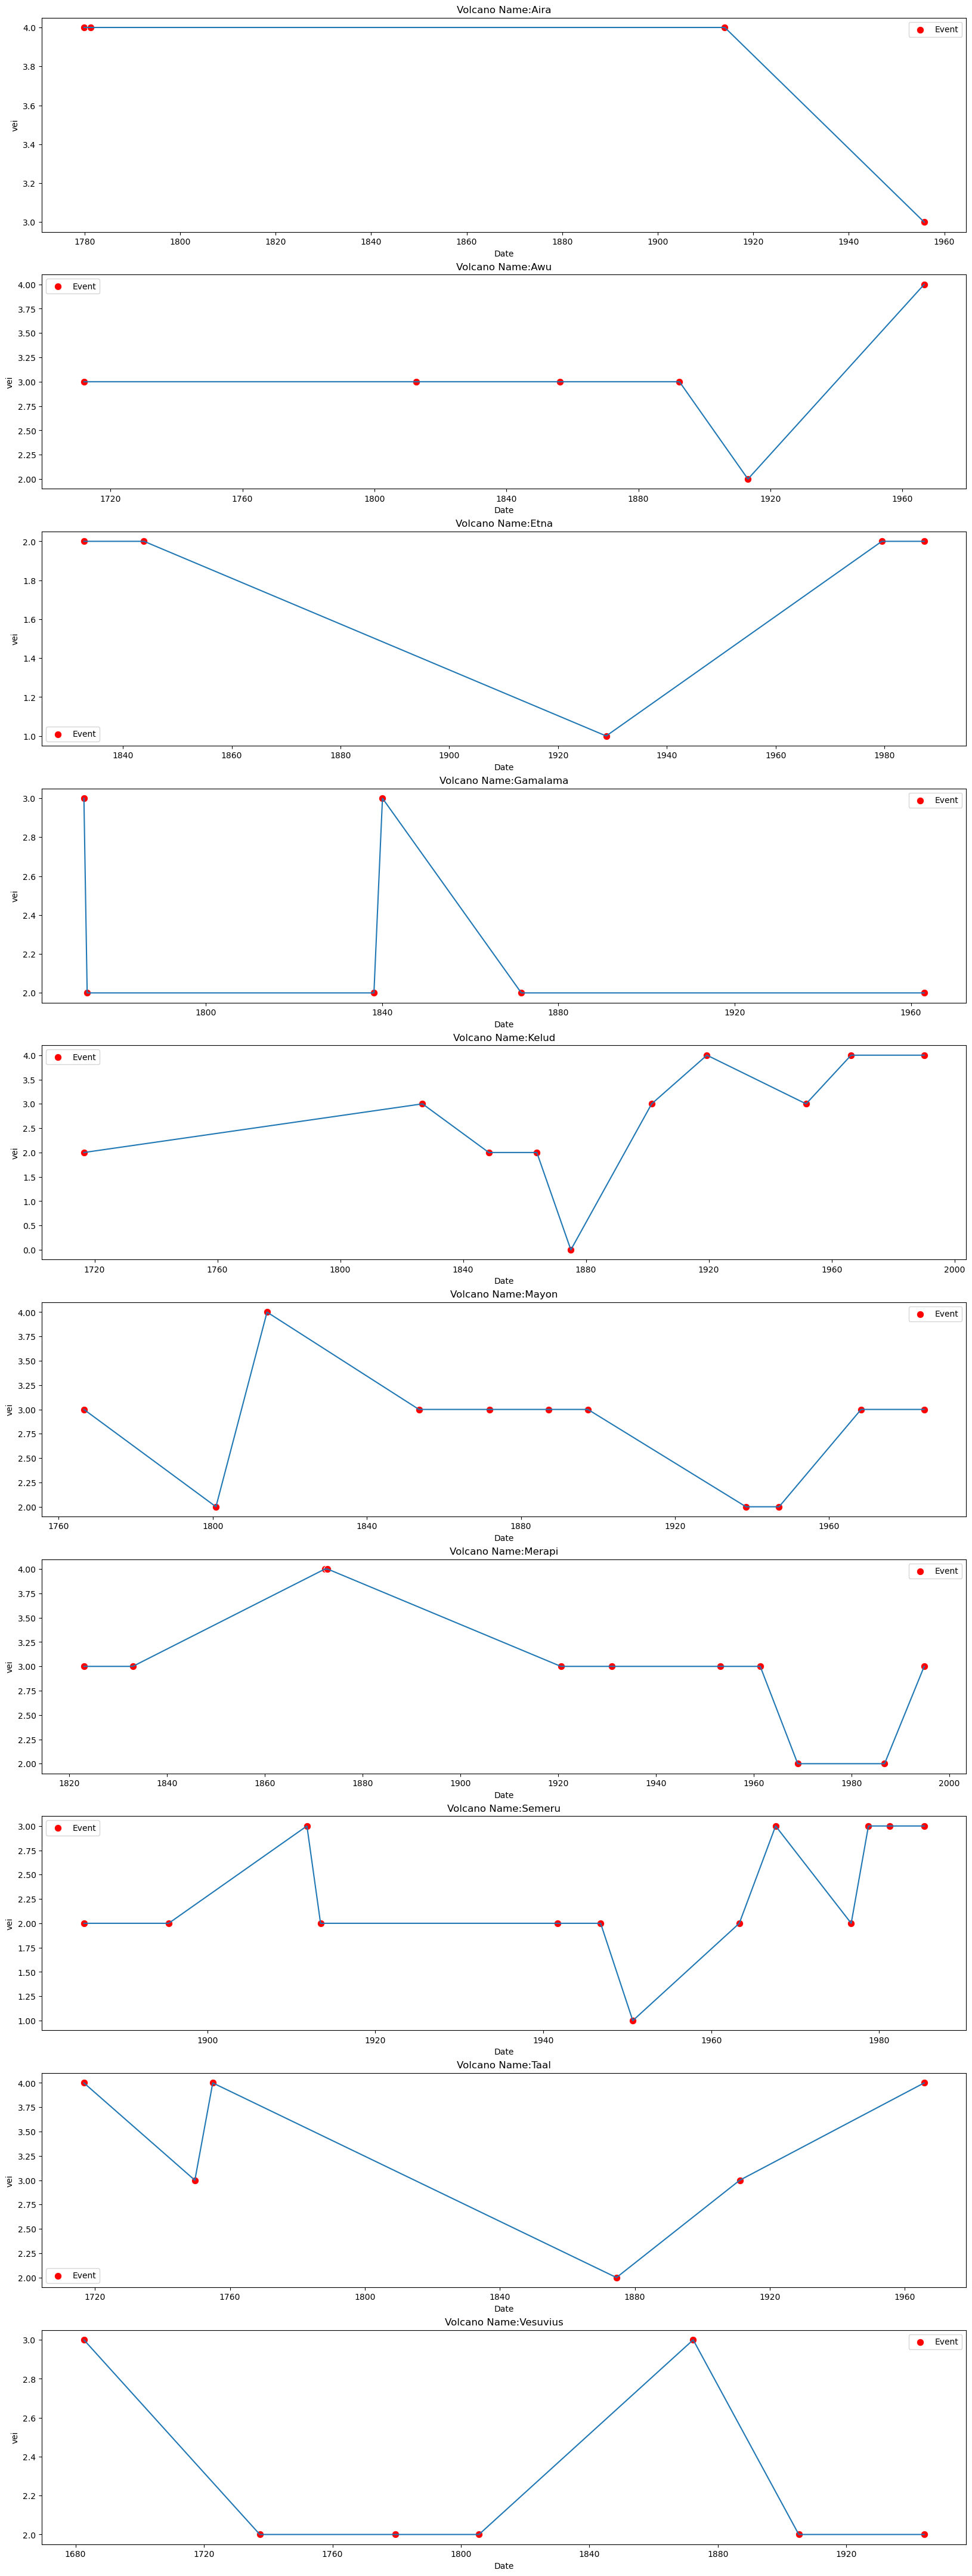

In [63]:
fig,axs = plt.subplots(len(volc),figsize=(20,55),dpi=100)
# fig.suptitle('Volcanos VEI v/s Date')
ptr = 0
for name in volc.index:
    volcDf = new_df[new_df.name == name][['date','vei']]
    sns.lineplot(data=volcDf,x='date',y='vei',ax=axs[ptr])
    sns.scatterplot(data=volcDf,x='date',y='vei',ax=axs[ptr],label='Event',color='red',s=80)
    
    axs[ptr].set_title(f"Volcano Name:{name}")
    axs[ptr].set_xlabel('Date')
    ptr +=1
plt.show()   

### **Part 3: Fiery Jobs  (15 POINTS TOTAL)**

Proficiency in SQL is also super important. SQL databases are essentially relational databases in which there are vast amounts of tabular data. which can often be used to connect with related tablular data. [This](https://www.w3schools.com/sql/) is a pretty good intro into learning more about SQL.

Check out this [tutorial](https://mode.com/sql-tutorial/introduction-to-sql/) for some clarifications on SQL.

Now! We'll be using **sqlite** to access a database.
* Start by downloading the sql lite file and putting it in the same directory as this [notebook](https://www.kaggle.com/datasets/kaggle/sf-salaries) (hit the 'download' button in the upper right).
* Check out the description of the data so you know the table / column names.

The following code will use sqlite3 to create a database connection. sqlite3 is the library in Python that assists in navigating through SQL databases.

In [64]:
import sqlite3
# import pandas as pd. Pandas was already imported from the previous sections

conn = sqlite3.connect("database.sqlite")
crsr = conn.cursor()

In [65]:
# This code will let you check out the different tables within the database.
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = crsr.execute(query).fetchall()
print(tables)

[('Salaries',), ('new_Salaries',)]


##### **Remember that each problem should be solved with a single sql query.**
**All outputs must be shown**

#### **3.1.1: 2 Points**
***From the Salaries table, get the average base pay for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) between the year 2011 to 2013.***

In [66]:
query = "SELECT AVG(BasePay)AS AVG_BASE_PAY FROM SALARIES WHERE JOBTITLE LIKE '%FIREFIGHTER%' "

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

AVG_BASE_PAY
0  101199.486996

#### **3.1.2: 2 Points**
***From the Salaries table, create a table for the year 2014, with a job title of "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) making under $100,000 as a base pay, and sort in descending order by salary.***

In [67]:
query = 'REMOVE THIS CONTENT AND ANSWER IN HERE'
query = "SELECT * FROM SALARIES WHERE JOBTITLE LIKE '%FIREFIGHTER%' AND YEAR = 2014 AND BASEPAY < 100000 ORDER BY BASEPAY DESC"

# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

Id              EmployeeName                   JobTitle   BasePay  \
0    117471            Cary P Butcher                Firefighter  99889.45   
1    117448             Travis J Rail                Firefighter  99527.95   
2    113545         Francisco A Ochoa                Firefighter  99442.91   
3    118757          Ashley S Jardine  EMT/Paramedic/Firefighter  99364.17   
4    116445      Stephanie L Mcknight                Firefighter  98704.80   
5    115057      Destin Rey S Tianero  EMT/Paramedic/Firefighter  98673.65   
6    117647       Robert Craig Gordon  EMT/Paramedic/Firefighter  98637.95   
7    119309               Sean A Zamb                Firefighter  98502.41   
8    114523          Brian K Sullivan                Firefighter  98486.78   
9    114418          Arthur I Julaton  EMT/Paramedic/Firefighter  98449.85   
10   118359    Christopher I Sandoval  EMT/Paramedic/Firefighter  98369.56   
11   113265             Joseph W Egan                Firefighter  98044.24   
12   112566          Dustin D Stewart                Firefighter  97998.90   
13   116074                Robi S Tse                Firefighter  97962.40   
14   113153           Daniel W Murphy                Firefighter  97760.38   
15   113397             Scott J Mason                Firefighter  97567.20   
16   114687              John J Ayers                Firefighter  97567.19   
17   118281            Grayson D Ward                Firefighter  97567.19   
18   119807         Hashim A Anderson                Firefighter  97567.19   
19   113061            John P Vagenas                Firefighter  97567.18   
20   117806             Philip M Korn                Firefighter  97567.18   
21   119294        Nicholas A Sabella                Firefighter  97567.18   
22   115054            Patrick M Ryan                Firefighter  97521.88   
23   114545          Dwight G Nackord                Firefighter  97521.87   
24   113171             James J James                Firefighter  97521.86   
25   113663              Andrew B Yee                Firefighter  97521.86   
26   114587     Christopher P Chambre                Firefighter  97521.86   
27   114920       Joseph C Del Grande                Firefighter  97521.86   
28   115094              Colin Carter                Firefighter  97521.86   
29   113229               Don L Noble                Firefighter  97521.84   
30   115782              Tanna S Hall                Firefighter  97476.51   
31   113053           Nicole D Cabaud                Firefighter  97316.35   
32   120944           Jennifer M Stow  EMT/Paramedic/Firefighter  97229.73   
33   118517            David M Maxion                Firefighter  97215.41   
34   119105          Brandon E Murray                Firefighter  97215.31   
35   114024            Scott D Bryant                Firefighter  96996.02   
36   119248          Emily S O'Rourke                Firefighter  96940.13   
37   118229       Jennifer M Romanini                Firefighter  96935.62   
38   116593           Michael J Horta                Firefighter  96715.54   
39   116157            Travis E Scott                Firefighter  96675.70   
40   117619             Che W Soriano  EMT/Paramedic/Firefighter  96654.97   
41   118285          Jonathan M Honda                Firefighter  96602.28   
42   112372             Jamie Serchia                Firefighter  96602.27   
43   113286             Simon D Lewis                Firefighter  96602.27   
44   113662            Matthew R Barr                Firefighter  96602.27   
45   117224           Brian A Machado                Firefighter  96602.27   
46   118079              Clarence Hom                Firefighter  96602.27   
47   114268           David R Filkins                Firefighter  96556.94   
48   118723         Jonathan A Truppa                Firefighter  96556.94   
49   121512          Edward Alexander  EMT/Paramedic/Firefighter  96555.65   
50   115451         Jennifer K 

#### **3.1.3: 4 Points**
***Create a dataframe with averages of base pay, averages of benefits, and averages of overtime for "firefighters" (all job titles consisting of the word "firefighter" (not case sensitive)) as well as a column with the sum of these three values.***

***Exclude job titles containing "FIREFIGHTER" (case-sensitive)***

In [68]:
query = 'REMOVE THIS CONTENT AND ANSWER IN HERE'
query = "SELECT AVG(BasePay) AS AVGBASE, AVG(Benefits) AS AVGBENE, AVG(OvertimePay) AS AVGOVER,AVG(BasePay)+AVG(Benefits)+AVG(OvertimePay) AS AVGTOTAL FROM SALARIES WHERE JOBTITLE LIKE '%FIREFIGHTER%' "
# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

AVGBASE      AVGBENE       AVGOVER       AVGTOTAL
0  101199.486996  29404.01156  25932.604456  156536.103012

#### **3.1.4: 7 Points**

***Finally, we'll create our own table in our database. Separate the Salaries table by years, and add it back to the database. Using a loop might be helpful.***

* You may use basic python to complete the task. However, using querying on SQL is **mandatory**.
* Feel free to **use multiple lines of code for this problem only.**
* Check out this [Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html)

In [69]:
query = "SELECT DISTINCT(YEAR) FROM SALARIES"
# KEEP THIS. It will display the whole dataframe.
years = pd.read_sql(query, conn)
years

Year
0  2011
1  2012
2  2013
3  2014

In [70]:
# REMOVE THIS CONTENT AND ANSWER IN YOUR OWN WAY
concatArr = []
for year in tqdm(years.Year):
    queryTemp = f"SELECT * FROM SALARIES WHERE YEAR = {year}"
    concatArr.append(pd.read_sql(queryTemp, conn))

100%|██████████| 4/4 [00:00<00:00,  4.91it/s]


In [71]:
newSQL_Df = pd.concat(concatArr)
newSQL_Df.head()

Id       EmployeeName                                        JobTitle  \
0   1     NATHANIEL FORD  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY   
1   2       GARY JIMENEZ                 CAPTAIN III (POLICE DEPARTMENT)   
2   3     ALBERT PARDINI                 CAPTAIN III (POLICE DEPARTMENT)   
3   4  CHRISTOPHER CHONG            WIRE ROPE CABLE MAINTENANCE MECHANIC   
4   5    PATRICK GARDNER    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)   

     BasePay OvertimePay   OtherPay Benefits   TotalPay  TotalPayBenefits  \
0  167411.18         0.0  400184.25           567595.43         567595.43   
1  155966.02   245131.88  137811.38           538909.28         538909.28   
2  212739.13   106088.18    16452.6           335279.91         335279.91   
3    77916.0    56120.71   198306.9           332343.61         332343.61   
4   134401.6      9737.0  182234.59           326373.19         326373.19   

   Year Notes         Agency Status  
0  2011        San Francisco         
1  2011        San Francisco         
2  2011        San Francisco         
3  2011        San Francisco         
4  2011        San Francisco

In [73]:
# newSQL_Df.to_sql(name='new_Salaries', con=conn)

In [74]:
# Run this code to check if you successfully added your table.
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('Salaries',), ('new_Salaries',)]


![volcano](https://as1.ftcdn.net/v2/jpg/06/34/76/64/1000_F_634766457_0fZbpYj6aBLlldO1jADUPpKTRLnNmngs.jpg)

### **Part 4: Be Creative with SQL  (20 POINTS TOTAL)**

For a more interactive SQL experience within a Jupyter notebook or Google Colab, you can use the %sql magic command from the ipython-sql extension. Here's how:

* Install ipython-sql: !pip install ipython-sql
* Load the extension and connect to SQLite:

%load_ext sql

%sql sqlite:///restaurent.db


* Run SQL queries directly in cells using

%%sql

However, you can also continue to import the sqlite3 library and create a connection and cursor to execute SQL commands, as you did before. The choice is up to you.

*** Part 4.1(a)  CREATE A TABLE ***

Create a table called **MyRestaurants** with the following attributes:

* RestaurantName: A VARCHAR field
* FoodType: A VARCHAR field
* DistanceFromHome: An INTEGER field representing the distance (in minutes) from your house
* LastVisitDate: A DATE field representing the date of your last visit
* Liked: A BOOLEAN field indicating whether you like the restaurant or not

In [75]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [76]:
%sql sqlite:///MyRestaurants.db

In [77]:
# %%sql
# CREATE TABLE MYRESTAURANTS (
# 	RestaurantName TEXT NOT NULL,
# 	FoodType TEXT NOT NULL,
# 	DistanceFromHome INTEGER,
# 	LastVisitDate DATE,
# 	Liked BOOLEAN
# );

In [79]:
%%sql
SELECT * FROM MYRESTAURANTS

 * sqlite:///MyRestaurants.db
Done.


[('Paradise', 'Biryani', 1, '2024-08-08', 1),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1),
 ('KFC', 'Burger', 5, '2024-02-12', 0),
 ('Nandos', 'English', 10, None, None),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1)]

*** Part 4.1(b) Insert Tuples ***

Insert at least five tuples using the SQL INSERT command, executing it five (or more) times.

* Ensure that you insert ** at least one restaurant that you liked**, **at least one restaurant that you did not like**, and **at least one restaurant where the Liked field is set to NULL**.

In [80]:
[('Paradise','Biryani',1,'2024-08-08',True),('Nizams','Kebab',3,'2023-01-17',True),('KFC','Burger',5,'2024-02-12',False),
 ('Nandos','English',10,None,None),('Pizza Bakery','Pizza',8,'2024-05-25',True)]

[('Paradise', 'Biryani', 1, '2024-08-08', True),
 ('Nizams', 'Kebab', 3, '2023-01-17', True),
 ('KFC', 'Burger', 5, '2024-02-12', False),
 ('Nandos', 'English', 10, None, None),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', True)]

In [81]:
#,('Nizams','Kebab','3','2023-01-17',True),('KFC','Burger',5,'2024-02-12',False),('Nandos','English',10,None,None),('Pizza Bakery','Pizza',8,'2024-05-25',True)

In [82]:
%%sql
INSERT INTO MYRESTAURANTS (RestaurantName,FoodType,DistanceFromHome,LastVisitDate,Liked) VALUES ('Paradise','Biryani',1,'2024-08-08',True),('Nizams','Kebab','3','2023-01-17',True),('KFC','Burger',5,'2024-02-12',False),('Nandos','English',10,null,null),('Pizza Bakery','Pizza',8,'2024-05-25',True)

 * sqlite:///MyRestaurants.db
5 rows affected.


[]

*** Part 4.1(c) ***

Write a SQL query to return all restaurants in your table.

In [83]:
%%sql
SELECT * FROM MYRESTAURANTS

 * sqlite:///MyRestaurants.db
Done.


[('Paradise', 'Biryani', 1, '2024-08-08', 1),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1),
 ('KFC', 'Burger', 5, '2024-02-12', 0),
 ('Nandos', 'English', 10, None, None),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1),
 ('Paradise', 'Biryani', 1, '2024-08-08', 1),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1),
 ('KFC', 'Burger', 5, '2024-02-12', 0),
 ('Nandos', 'English', 10, None, None),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1)]

*** Part 4.1(d) ***

Now experiment with a few of SQLite's output formats using the SQL query you wrote for question above:

* print the results (Part 4.1(c)) in list form, delimited by " | "

Sample output: Sushi Place | Japanese | 15 | 2024-05-01 | 1

In [84]:
conn = sqlite3.connect("MyRestaurants.db")
crsr = conn.cursor()

In [85]:
query = "SELECT * FROM MyRestaurants"
# KEEP THIS. It will display the whole dataframe.
df = pd.read_sql(query, conn)
df

RestaurantName FoodType  DistanceFromHome LastVisitDate  Liked
0       Paradise  Biryani                 1    2024-08-08    1.0
1         Nizams    Kebab                 3    2023-01-17    1.0
2            KFC   Burger                 5    2024-02-12    0.0
3         Nandos  English                10          None    NaN
4   Pizza Bakery    Pizza                 8    2024-05-25    1.0
5       Paradise  Biryani                 1    2024-08-08    1.0
6         Nizams    Kebab                 3    2023-01-17    1.0
7            KFC   Burger                 5    2024-02-12    0.0
8         Nandos  English                10          None    NaN
9   Pizza Bakery    Pizza                 8    2024-05-25    1.0

In [86]:
for _,row in df.iterrows():
    print(f"{row.RestaurantName} | {row.FoodType} | {row.DistanceFromHome} | {row.LastVisitDate} | {row.Liked}")
    # print(row)

Paradise | Biryani | 1 | 2024-08-08 | 1.0
Nizams | Kebab | 3 | 2023-01-17 | 1.0
KFC | Burger | 5 | 2024-02-12 | 0.0
Nandos | English | 10 | None | nan
Pizza Bakery | Pizza | 8 | 2024-05-25 | 1.0
Paradise | Biryani | 1 | 2024-08-08 | 1.0
Nizams | Kebab | 3 | 2023-01-17 | 1.0
KFC | Burger | 5 | 2024-02-12 | 0.0
Nandos | English | 10 | None | nan
Pizza Bakery | Pizza | 8 | 2024-05-25 | 1.0


***Part 4.1(d)***

Modify your SQL query such that it prints "I liked it" or "I hated it" for each restaurant you liked or not.


Note that you are not allowed to modify the table on disk. You should be able to answer this question using only a SELECT statement. A solution that creates and uses an extra table, howerver, will be accepted.

Check: https://www.sqlitetutorial.net/sqlite-case/


In [87]:
%%sql
SELECT IF(LIKED=1,'I liked it','I hated it') FROM MyRestaurants

 * sqlite:///MyRestaurants.db
(sqlite3.OperationalError) no such function: IF
[SQL: SELECT IF(LIKED=1,'I liked it','I hated it') FROM MyRestaurants]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [88]:
%%sql
SELECT RestaurantName,
CASE 
    WHEN LIKED=1 
    THEN 'I liked it' 
    ELSE 'I hated it' 
END AS LIKED_OR_HATES FROM MyRestaurants

 * sqlite:///MyRestaurants.db
Done.


[('Paradise', 'I liked it'),
 ('Nizams', 'I liked it'),
 ('KFC', 'I hated it'),
 ('Nandos', 'I hated it'),
 ('Pizza Bakery', 'I liked it'),
 ('Paradise', 'I liked it'),
 ('Nizams', 'I liked it'),
 ('KFC', 'I hated it'),
 ('Nandos', 'I hated it'),
 ('Pizza Bakery', 'I liked it')]

*** Part 4.1(e) ***

Write a SQL query to return all restaurants that you like but have not visited in the past three months.

In [89]:
%%sql
SELECT * FROM MyRestaurants WHERE LIKED=1 AND LastVisitDate>'2024-06-21'

 * sqlite:///MyRestaurants.db
Done.


[('Paradise', 'Biryani', 1, '2024-08-08', 1),
 ('Paradise', 'Biryani', 1, '2024-08-08', 1)]

***Part 4.2(a)***

** Next we will focus on INNER JOIN **

Let's add a second table called **"RestaurantReviews"** and demonstrate how to perform an inner join between MyRestaurants and RestaurantReviews.




Create the RestaurantReviews Table
First, we'll create the RestaurantReviews table with the following attributes:

* RestaurantName (to match the Name in MyRestaurants)
* ReviewText (text of the review)
* Rating (integer rating)

In [90]:
# %%sql
# CREATE TABLE RestaurantReviews (
# 	RestaurantName TEXT NOT NULL,
# 	ReviewText TEXT,
#     Rating INTEGER
# );

*** Part 4.2(b) ***

Insert Data into RestaurantReviews
Insert some sample data (at least 5) into this table:


In [91]:
[('Paradise','Best Biryani in town.',5),('Nizams','Nice visit, nice vibes',4),('Subway','best fastfood chain',4.5),
 ('Cornerstone','crowded all the time',2),('Pizza Bakery','Decent Pizzaria',3)]

[('Paradise', 'Best Biryani in town.', 5),
 ('Nizams', 'Nice visit, nice vibes', 4),
 ('Subway', 'best fastfood chain', 4.5),
 ('Cornerstone', 'crowded all the time', 2),
 ('Pizza Bakery', 'Decent Pizzaria', 3)]

In [92]:
%%sql
INSERT INTO RestaurantReviews VALUES ('Paradise','Best Biryani in town.',5),('Nizams','Nice visit, nice vibes',4),('Subway','best fastfood chain',4.5),('Cornerstone','crowded all the time',2),('Pizza Bakery','Decent Pizzaria',3)

 * sqlite:///MyRestaurants.db
5 rows affected.


[]

*** Part 4.2(c) Inner Join Query ***
Now perform an inner join between MyRestaurants and RestaurantReviews based on the restaurant name to combine the information from both tables and show the results.

In [93]:
%%sql
SELECT * FROM MyRestaurants M1 INNER JOIN RestaurantReviews M2 ON M1.RestaurantName = M2.RestaurantName

 * sqlite:///MyRestaurants.db
Done.


[('Paradise', 'Biryani', 1, '2024-08-08', 1, 'Paradise', 'Best Biryani in town.', 5),
 ('Paradise', 'Biryani', 1, '2024-08-08', 1, 'Paradise', 'Best Biryani in town.', 5),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1, 'Nizams', 'Nice visit, nice vibes', 4),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1, 'Nizams', 'Nice visit, nice vibes', 4),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1, 'Pizza Bakery', 'Decent Pizzaria', 3),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1, 'Pizza Bakery', 'Decent Pizzaria', 3),
 ('Paradise', 'Biryani', 1, '2024-08-08', 1, 'Paradise', 'Best Biryani in town.', 5),
 ('Paradise', 'Biryani', 1, '2024-08-08', 1, 'Paradise', 'Best Biryani in town.', 5),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1, 'Nizams', 'Nice visit, nice vibes', 4),
 ('Nizams', 'Kebab', 3, '2023-01-17', 1, 'Nizams', 'Nice visit, nice vibes', 4),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1, 'Pizza Bakery', 'Decent Pizzaria', 3),
 ('Pizza Bakery', 'Pizza', 8, '2024-05-25', 1, 'Pizza Bakery', 'Decent Pizzaria', 3)]

## THE END OF HW 1 ##